### 선형 모델(Linear Models)


- 선형 모델은 100여년 전에 개발되었고, 지난 몇십 년 동안 폭넓게 연구되고 현재도 널리 쓰임
- 선형 모델은 입력 feature에 대한 선형 함수를 만들어 예측을 수행

### 회귀의 선형 모델  
- 회귀의 경우 선형 모델을 위한 일반적인 예측함수는 다음과 같음  
- 예측y = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b  
- x[0] 부터 x[p] 까지는 하나의 데이터 포인트에 대한 feature를 나타내며(feature의 수는 p+1)  
- w 와 b는 모델이 학습할 파리미터  
- 그리고 예측y는 모델이 만들어낸 예측값  
- 특성이 하나인 데이터셋이라면 식은 다음과 같음  
- 예측y = w[0] * x[0] + b  
- w[0] 는 기울기이고 b는 y축과 만나는 절편  
- feature가 많아지면 w는 각 feature에 해당하는 기울기를 모두 가짐  
- 다르게 생각하면 예측값은 입력 feature에 w의 각 가중치(음수도 가능)를 곱해서 더한 가중치 합으로 볼 수 있음
- 1차원 wave 데이터셋으로 파라미터 w[0]와 b를 직선처럼 되도록 학습시켜 보자

w[0]: 0.393906  b: -0.031804


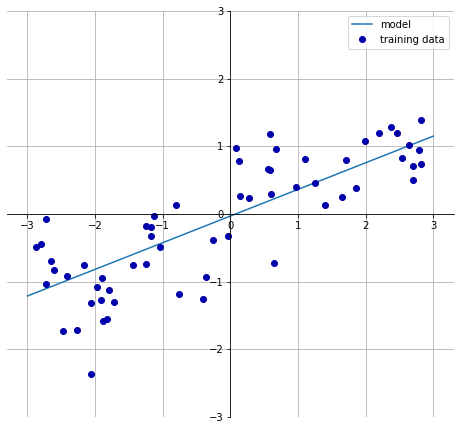

In [1]:
import mglearn

mglearn.plots.plot_linear_regression_wave()

- 회귀를 위한 선형 모델은 feature가 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원에서는 초평면(hyperplane)이 되는 회귀 모델의 특징을 가짐  
- 이 직선과 KNeighborsRegression을 사용하여 만든 이전 그림의 선과 비교해 보면 직선을 사용한 예측이 더 제약이 많아 보임  
- 즉 데이터의 상세 정보를 모두 잃어버린 것처럼 보임(어느 정도 사실)  
- target y가 feature들의 선형 조합이라는 것은 매우 과한(때론 비현실적인) 가정임  
- 하지만 1차원 데이터셋만 놓고 봐서 생긴 편견일 수 있음  
- feature가 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있음  
- 특히 훈련 데이터보다 feature가 더 많은 경우엔 어떤 target y 도 완벽하게(훈련 세트에 대해서) 선형 함수로 모델링할 수 있음  
- 회귀를 위한 선형 모델은 다양하게 존재, 이 모델들은 훈련 데이터로부터 모델 파라미터 w와 b를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가 남

### 선형 회귀(최소제곱법) : Ordinary least squares  
- 선형 회귀(linear regression) 또는 최소제곱법(ordinary least squares)은 가장 간단하고 오래된 회귀용 선형 알고리즘  
- 선형 회귀는 예측과 훈련 세트에 있는 target y 사이의 평균제곱오차(mean squared error)를 최소화하는 파리미터 w와 b를 찾음  
- 평균제곱오차는 예측값과 target 값의 차이를 제곱하여 더한 후에 샘플의 수로 나눈 것  
- 선형 회귀는 추가 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법도 없음

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

- 기울기 파라미터 w는 가중치(weight) 또는 계수(coefficient) 라고 하며 lr 객체의 coef_ 속성에 저장되어 있고 편향(bias) 또는 절편(intercept)에 해당하는 파라미터 b는 intercept_ 속성에 저장되어 있음

In [3]:
print("lr.conf_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.conf_: [0.39390555]
lr.intercept_: -0.031804343026759746


- intercept_ 속성은 항상 실수값 하나지만, coef_ 속성은 각 입력 feature에 하나씩 대응되는 Numpy 배열임  
- wave 데이터셋에는 입력 feature가 하나뿐이므로 lr.coef_ 도 원소를 하나만 가지고 있음  

In [4]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


- R<sup>2</sup> 값이 0.66 인 것은 그리 좋은 결과가 아님  
- 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷, 즉 과대적합이 아니라 과소적합인 상태를 의미  
- 1차원 데이터셋에서는 모델이 매우 단순하므로 과대적합을 걱정할 필요가 없음  
- 그러나 feature 가 많은 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높음  
- LinearRegression 모델이 보스턴 주택가격 데이터셋 같은 복잡한 데이터셋에서 어떻게 동작하는지 확인해보자  
- 이 데이터셋에는 샘플이 506개, feature는 확장된 것을 포함해 104개

In [5]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


- 이런 성능의 차이는 모델이 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 함
- 기본 선형 회귀 방식 대신 가장 널리 쓰이는 모델은 리지(Ridge) 회귀임

### Ridge Regression  
- 리지도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용   
- 하지만 리지 회귀에서는 가중치 w 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음  
- 가중치의 절대값을 가능한 한 작게 만드는 것, 즉 w의 모든 원소가 0에 가깝게 되길 원함  
- 이는 모든 feature가 출력에 주는 영향을 최소한으로 만듬(기울기를 작게 만듬)  
- 이런 제약을 규제(Regularization)라 함  
- 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미  
- 리지 회귀에 사용하는 규제 방식을 L2 규제라 함  
- 리지 회귀는 linear_model.Ridge에 구현되어 있음  

In [7]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


- 훈련 세트의 점수는 LinearRegression 보다 낮지만 테스트 세트에 대한 점수는 더 높음
- 모델의 복잡도가 낮아지면 훈련 세트의 성능은 나빠지지만 더 일반화된 모델이 됨

- Ridge 는 모델을 단순하게 해주고 훈련 세트에 대한 성능 사이를  절충할 수 있는 방법을 제공함  
- 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할 지를 지정  
- 앞의 예제에서는 기본값인 alpha=1.0 을 사용  
- 최적의 alpha 값은 사용하는 데이터셋에 의존적임  
- alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에 도움을 줌

In [8]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.64


In [9]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.77


- alpha 값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 과대적합쪽으로 이동하는 경향이 됨
- 아주 작은 alpha 값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아짐 (alpha=0.00001)

- 이 코드에서는 alpha=0.1 이 꽤 좋은 성능을 보임  
- 테스트 세트에 대한 성능이 높아질 때까지 alpha 값을 줄일 수 있을 것임  
- alpha 값이 모델 복잡도와 어떤 관련이 있는지 살펴봄(좋은 매개변수를 선택하는 문제는 또 다른 영역)  
- 또한 alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지를 조사해 보면 alpha 매개변수가 모델을 어떻게 변경시키는지 더 깊게 이해할 수 있음  
- 높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_ 의 절대값 크기가 작을 것이라고 예상할 수 있음

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

- 규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것  
- 다음은 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 LinearRegression과 Ridge(alpha=1)을 적용한 것임  
- 이렇게 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선(Learning curve) 라고 함

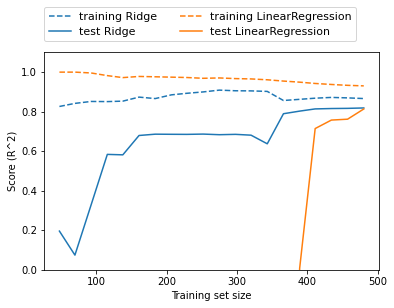

In [11]:
mglearn.plots.plot_ridge_n_samples()

- 리지는 규제가 적용되므로 선형 회귀보다는 전반적으로 훈련 데이터 점수가 낮음  
- 그러나 테스트 데이터에서는 리지의 점수가 더 높음  
- 두 모델 전부 데이터가 많아질수록 성능이 향상됨  
- 데이터가 많아질수록 선형 회귀의 모델은 데이터를 기억하거나 과대적합하기가 어려워짐을 보임